In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

seed: 1752819049
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.5127, node: Cc1ccc([C@H](NC(=O)N(C)C2CCOCC2)C2CC2)cc1
<Best reward updated> 2 - time: 0.02, reward: 0.7792, node: O=C(CSc1nc2sc3c(c2c(=O)n1-c1ccc(Cl)cc1)CCC3)Nc1ccccc1Cl
<Best reward updated> 12 - time: 0.13, reward: 0.7887, node: Cc1ccc(NS(=O)(=O)c2ccc(-c3csc(-c4ccccc4)n3)cc2)cc1
<Best reward updated> 60 - time: 0.68, reward: 0.7949, node: O=C1C(=O)/C(=C/c2ccc(C(F)(F)F)cc2)S/C1=C\c1ccc(Oc2ccccc2)cc1
100 - time: 1.22, average over 100: 0.1047
<Best reward updated> 140 - time: 1.74, reward: 0.9384, node: C=C[C@@H]([NH2+]CC(F)(F)F)C(=O)[O-]
200 - time: 2.44, average over 100: 0.2086
300 - time: 3.59, average over 100: 0.1524
400 - time: 4.74, average over 100: 0.3245
500 - time: 5.82, average over 100: 0.4803
600 - time: 6.85, average over 100: 0.4594
700 - time: 8.04, average over 100: 0.6563
800 - time: 9.16, average over 100: 0.6070
900 - time: 10.38, average over 100: 0.6600
1000 - time: 11.55, av

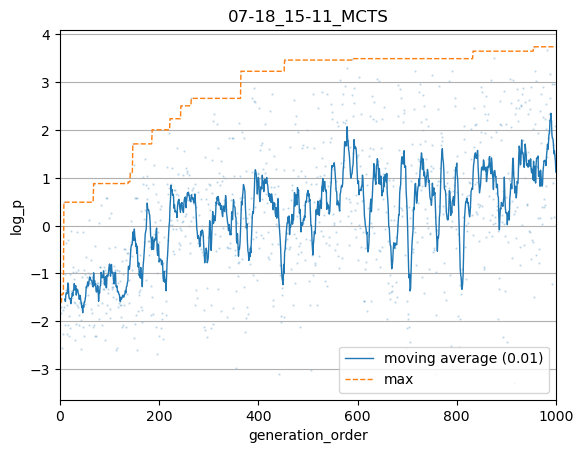

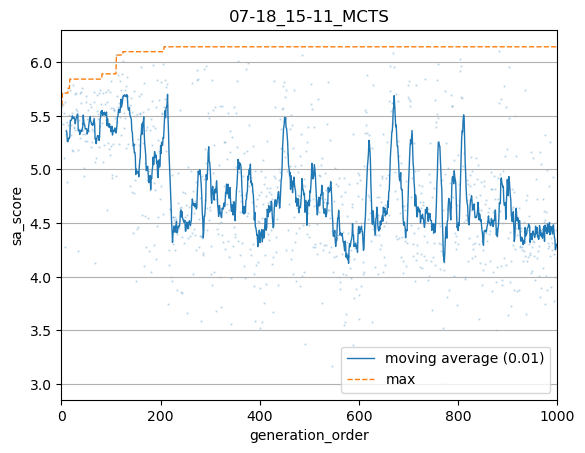

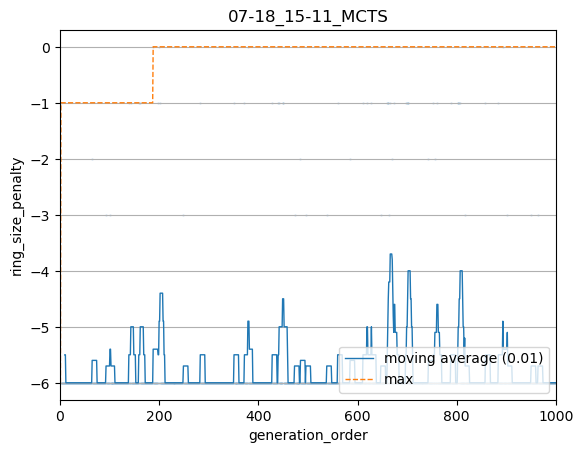

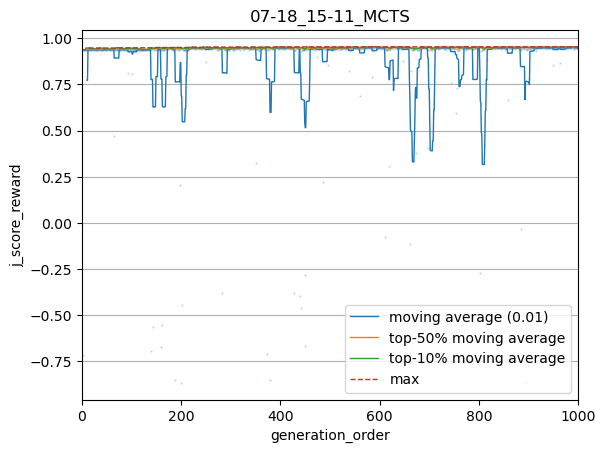

number of generated nodes: 1000
valid rate: 0.999000999000999
unique rate: 1.0
node_per_sec: 143.9766644267343
best_reward: 0.9540527518499216
average_reward: 0.8870898680320211
top_10_auc: 0.09037748242292512


In [6]:
# start generation

yaml_path_1 = "config/chain/de_novo_rnn.yaml"
yaml_path_2 = "config/chain/lead_jensen.yaml"

conf_1 = conf_from_yaml(yaml_path_1, repo_root)
conf_2 = conf_from_yaml(yaml_path_2, repo_root)

generator_1 = generator_from_conf(conf_1, repo_root)
generator_1.generate(max_generations=conf_1.get("max_generations"), time_limit=conf_1.get("time_limit"))
best_key = generator_1.top_k(k=1)[0][0]

conf_2["root"] = best_key
generator_2 = generator_from_conf(conf_2)
generator_2.generate(max_generations=conf_2.get("max_generations"), time_limit=conf_2.get("time_limit"))

generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

# queue_generations(c1, c2)

In [ ]:
# continue generation
generator_2.generate(time_limit=100, max_generations=100)
generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

In [ ]:
#save mcts
save_path = generator_2.output_dir() + "save.mcts"
generator_2.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf_3 = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator_3 = generator_from_conf(conf_3, repo_root)
generator_3 = Generator.load(load_dir + "save.mcts", generator_3.transition)